In [1]:
import matplotlib as mlp
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as stapi
import sklearn.metrics as metrics
import sklearn.linear_model as sklm
from sklearn import decomposition 
import patsy
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
sns.set()

# Links de Google Trends

In [3]:
links = [
   # "https://trends.google.com/trends/explore?date={}-{}-{}%20{}-{}-{}&geo=GT&q=sexo,putas,gay,fiesta,sexo%20anal", 
   # "https://trends.google.com/trends/explore?date={}-{}-{}%20{}-{}-{}&geo=GT&q=%2Fm%2F0cjf0,dolor%20de%20cabeza,%2Fm%2F01j6t0,sintomas%20del%20vih,sintomas%20del%20sida",
   # "https://trends.google.com/trends/explore?date={}-{}-{}%20{}-{}-{}&geo=GT&q=gonorrea,%2Fm%2F074m2,infiel,herpes,infidelidad"
] 
for y in range(2015, 2018):
    for m, d2 in zip(range(1,13), [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]):
        for link in links:
            print(link.format(y,str.zfill(str(m), 2),"01",y, str.zfill(str(m), 2), d2))

# Cargar y pre-procesar datos

In [4]:
#sigsa = pd.read_excel("../../../../Outcome Measurement Data/HIV/SIGSA - Solicitud 0593-2018/Solicitud 0593-2018 SIGSA SIDA 1.2 años 2014 al 2017.xlsx", 
#           skiprows=4, encoding="latin-1")
# sigsa.to_csv("../../../../Outcome Measurement Data/HIV/SIGSA - Solicitud 0593-2018/Solicitud 0593-2018 SIGSA SIDA 1.2 años 2014 al 2017.csv", index=False)
sigsa = pd.read_csv("../../../../Outcome Measurement Data/HIV/SIGSA - Solicitud 0593-2018/Solicitud 0593-2018 SIGSA SIDA 1.2 años 2014 al 2017.csv", 
                   index_col=0
                   )

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#sigsa.columns
pd.options.display.max_columns=1000
pd.options.display.width = 200

In [6]:
def countCods(x):
    return len(x.unique())

In [7]:
sigsa.columns = ["Año", "Mes", "Área de Salud", "Distrito de Salud", "Servicio de Salud", "Tipo Servicio", "Municipio",
"Fecha", "Codigo de Persona", "Lugar de Nacimiento-Depto", "Lugar de Nacimiento-Muni", 
"Fecha de Nacimiento-Day", "Fecha de Nacimiento-Month", "Fecha de Nacimiento-Year", 
"Nacionalidad", "Sexo", "Residencia Actual-Depto", "Residencia Actual-Muni", "Orientación Sexual",
"Pueblo", "Comunidad Liguistica", "Condición de Riesgo", "Motivo de Orientación", "Embarazo y Puerperio",
"Orientación Pre Prueba", "Se hizo la Prueba", "VIH-Prueba de Tamizaje", "VIH-Resultado-t", "VIH-Prueba Confirmatoria",
"VIH-Resultado-c", "Sif-Prueba Treponémica", "Sif-Resultado", "Sif-Prueba no Treponémica", "Sif-Resultado de la Dilución",
"HepB-Prueba de Tamizaje", "HepB-Resultado", "Entrega de Resultados con Orientacion Post Prueba", "Referencia"]

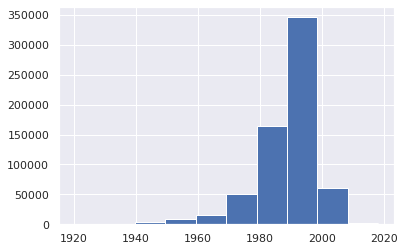

In [8]:
sigsa["Fecha de Nacimiento-Year"].hist()

In [9]:
sigsa["Condición de Riesgo"].value_counts()

Mujer en Riesgo                         460591
Hombre en Riesgo                         72952
Joven en Riesgo Social                   62127
-                                        25398
Trabajador Sexual                        19850
Privado de Libertad                       4624
Niño/a en contexto de vulnerabilidad      4108
Uniformado                                2892
Migrante                                  1080
Name: Condición de Riesgo, dtype: int64

In [10]:
sigsa["Orientación Sexual"].value_counts()

Heterosexual    613244
-                29492
Homosexual        5644
Bisexual          3052
Trans             2190
Name: Orientación Sexual, dtype: int64

In [11]:
def tryfun(f, defaultval=None):
    def w(i):
        try:
            return f(i)
        except:
            return defaultval
    return w

In [12]:
sigsa["Año"] = sigsa.Año.map(tryfun(int, None))

In [13]:
sigsa.Año.value_counts()

2017.0    252312
2016.0    221393
2015.0    179486
2014.0       431
Name: Año, dtype: int64

In [14]:
sigsa[sigsa["VIH-Resultado-c"]=="Reactivo"].groupby(["Año", "Mes", "Residencia Actual-Depto"]).apply(len).unstack([0,1]).fillna(0)

Año                     2014.0      2015.0                                                                  2016.0                                                                   2017.0        \
Mes                       5.0  9.0    1.0  2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  12.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  12.0   1.0   2.0    
Residencia Actual-Depto                                                                                                                                                                             
(OTROS)                    0.0  0.0    0.0  0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    0.0   0.0   
ALTA VERAPAZ               0.0  0.0    0.0  0.0   0.0   3.0   1.0   1.0  10.0  14.0   3.0  11.0   3.0   0.0    2.0   2.0   2.0   3.0   3.0   9.0   3.0   6.0   2.0   0.0   1.0   1.0    6.0   4.0   
BAJA VERAPAZ               0.0  0.0    0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   1.0   2.0   1.0   1.0    0.0   0.0   
CHIMALTENANGO              0.0  0.0    0.0  0.0   0.0   0.0   0.0   1.0   2.0   2.0   0.0   1.0   0.0   1.0    0.0   2.0   0.0   0.0   3.0   2.0   2.0   0.0   3.0   0.0   1.0   0.0    0.0   0.0   
CHIQUIMULA                 0.0  0.0    0.0  0.0   0.0   6.0   1.0   0.0   1.0   0.0   0.0   1.0   2.0   0.0    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   1.0    0.0   0.0   
EL PETEN                   0.0  0.0    0.0  0.0   0.0   5.0  17.0   2.0   7.0   5.0   2.0   5.0  14.0   0.0    0.0   2.0   4.0   3.0   4.0   6.0   2.0   7.0   5.0   5.0  11.0   5.0    6.0   5.0   
EL PROGRESO                0.0  0.0    0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0    0.0   1.0   
ESCUINTLA                  0.0  0.0    0.0  1.0   5.0  13.0  17.0  12.0  16.0  17.0  17.0  16.0  22.0  20.0   16.0  13.0  18.0  13.0  10.0  20.0  18.0  11.0  13.0  16.0  22.0  20.0   18.0  24.0   
GUATEMALA                  2.0  2.0    0.0  1.0  11.0  11.0   8.0   3.0  10.0  11.0   3.0   8.0   6.0  30.0    5.0   2.0   3.0   9.0   3.0   2.0  24.0   2.0   3.0   7.0   5.0   4.0    4.0   2.0   
HUEHUETENANGO              0.0  0.0    0.0  0.0   1.0   2.0   1.0   1.0   1.0   1.0   1.0   4.0   1.0   0.0    5.0   1.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0   0.0   0.0   1.0    1.0   1.0   
IZABAL                     0.0  0.0    0.0  0.0   2.0   6.0   3.0   9.0  11.0  11.0  11.0   7.0   0.0   2.0    3.0   9.0   6.0   7.0   9.0  11.0  11.0   5.0   7.0  10.0  12.0   7.0   16.0   8.0   
JALAPA                     0.0  0.0    0.0  0.0   0.0   0.0   1.0   0.0   0.0   2.0   2.0   1.0   1.0   0.0    0.0   0.0   0.0   2.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0    4.0   2.0   
JUTIAPA                    0.0  0.0    0.0  0.0   1.0   1.0   0.0   3.0   0.0   0.0   1.0   0.0   0.0   5.0    0.0   2.0   1.0   0.0   2.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0    1.0   0.0   
QUETZALTENANGO             0.0  0.0    0.0  6.0   4.0  39.0   5.0   5.0  11.0  10.0   5.0   8.0   0.0   3.0    2.0   7.0   3.0   8.0  10.0   6.0   6.0   1.0   4.0   3.0   4.0   8.0   11.0  13.0   
QUICHE                     0.0  0.0    0.0  0.0   0.0   2.0   0.0   0.0   0.0   2.0   0.0   1.0   0.0   0.0    0.0   0.0   0.0   0.0   3.0   3.0   1.0   2.0   0.0   0.0   0.0   0.0    0.0   0.0   
RETALHULEU                 0.0  0.0    0.0  0.0   1.0   3.0   0.0   3.0   2.0   0.0   3.0   1.0   0.0   0.0    3.0   1.0   3.0   2.0   0.0   1.0   1.0   1.0   0.0   0.0   1.0   3.0    0.0   3.0   
SACATEPEQUEZ               0.0  0.0    1.0  0.0   0.0   4.0   1.0   2.0   0.0   2.0   0.0   0.0   2.0   1.0    2.0   2.0   1.0   2.0   3.0   2.0   2.0   2.0   0.0   2.0   4.0   1.0    0.0   1.0   
SAN MARCOS                 0.0  1.0    0.0  5.0  11.0   5.0 

In [15]:
sigsa["Residencia Actual-Depto"].unique()

array(['ESCUINTLA', 'SANTA ROSA', 'GUATEMALA', 'QUETZALTENANGO',
       'TOTONICAPAN', 'SAN MARCOS', 'SUCHITEPEQUEZ', 'HUEHUETENANGO',
       'SOLOLA', 'QUICHE', 'RETALHULEU', nan, 'ZACAPA', 'EL PROGRESO',
       'ALTA VERAPAZ', 'SACATEPEQUEZ', 'CHIQUIMULA', '(OTROS)', 'IZABAL',
       'CHIMALTENANGO', 'JUTIAPA', 'BAJA VERAPAZ', 'EL PETEN', 'JALAPA'],
      dtype=object)

In [16]:
sigsaDeptos = {
    'ESCUINTLA': 5, 
    'SANTA ROSA': 6, 
    'GUATEMALA': 1,
    'QUETZALTENANGO': 9,
    'TOTONICAPAN': 8, 
    'SAN MARCOS': 12, 
    'SUCHITEPEQUEZ': 10, 
    'HUEHUETENANGO': 13,
    'SOLOLA': 7, 
    'QUICHE': 14, 
    'RETALHULEU': 11, 
    'ZACAPA': 19, 
    'EL PROGRESO': 2,
    'ALTA VERAPAZ': 16, 
    'SACATEPEQUEZ': 3, 
    'CHIQUIMULA': 20, 
    '(OTROS)': 0, 
    'IZABAL': 18,
    'CHIMALTENANGO': 4, 
    'JUTIAPA': 22, 
    'BAJA VERAPAZ': 15, 
    'EL PETEN': 17, 
    'JALAPA': 21
}

In [17]:
gtDeptos = {
    'Santa Rosa Department': 6, 
    'Suchitepequez': 10,
    'Petén Department': 17,
    'Zacapa Department': 19, 
    'Escuintla': 5, 
    'Jalapa Department': 21,
    'Huehuetenango Department': 13, 
    'Quetzaltenango Department': 9,
    'Guatemala Department': 1, 
    'Sacatepequez': 3, 
    'Alta Verapaz': 16,
    'Baja Verapaz Department': 15, 
    'Chimaltenango Department': 4,
    'Chiquimula Department': 20, 
    'Izabal Department': 18, 
    'Jutiapa Department': 22,
    'El Progreso Department': 2, 
    'Quiché Department': 14,
    'Retalhuleu Department': 11, 
    'San Marcos Department': 12,
    'Sololá Department': 7, 
    'Totonicapán Department': 8,
    'Santa Rosa': 6, 
    'Suchitepequez': 10,
    'Suchitepéquez': 10,    
    'Petén': 17,
    'Zacapa': 19, 
    'Escuintla': 5, 
    'Jalapa': 21,
    'Huehuetenango': 13, 
    'Quetzaltenango': 9,
    'Guatemala': 1, 
    'Sacatepequez': 3, 
    'Sacatepéquez': 3, 
    'Alta Verapaz': 16,
    'Baja Verapaz': 15, 
    'Chimaltenango': 4,
    'Chiquimula': 20, 
    'Izabal': 18, 
    'Jutiapa': 22,
    'El Progreso': 2, 
    'Quiché': 14,
    'Retalhuleu': 11, 
    'San Marcos': 12,
    'Sololá': 7, 
    'Totonicapán': 8
}

In [18]:
dfs1 = []
dfs2 = []
dfs3 = []
dirdata = "../../../../Outcome Measurement Data/HIV/GTrends/"
for f in os.listdir(dirdata):
    if "TS" not in f and "sintomas" in f:
        dfs1.append(pd.read_csv(dirdata + f, header = None, 
                               names = ["depto", "fever", "headache", "fatigue", "symptHIV", "symptSIDA"], 
                               skiprows=3).assign(filename=f))
    elif "TS" not in f and "coinfeccion" in f:
        dfs2.append(pd.read_csv(dirdata + f, header = None, 
                               names = ["depto", "gonorrea", "sifilis", "infiel", "herpes", "infdld"], 
                               skiprows=3).assign(filename=f))
    elif "TS" not in f and "comportamiento" in f:
        dfs3.append(pd.read_csv(dirdata + f, header = None, 
                               names = ["depto", "sexo", "mts", "gay", "fiesta", "sexoan"], 
                               skiprows=3).assign(filename=f))

In [19]:
gtrends = None
for df in [dfs1, dfs2, dfs3]:
    temp = pd.concat(df)
    temp["Año"] = temp.filename.map(lambda x: int(x.split("-")[2]))
    temp["Mes"] = temp.filename.map(lambda x: int(x.split("-")[3][0:2]))
    temp["Term"] = temp.filename.map(lambda x: x.split("-")[0])
    temp["deptocode"] = temp.depto.map(lambda x: gtDeptos.get(x))
    temp.drop(columns=["filename", "Term", "depto"], inplace=True)
    if gtrends is None:
        gtrends=temp
    else: 
        gtrends = gtrends.merge(temp, on=["Año", "Mes", "deptocode"], how="outer")

In [20]:
gtrends.applymap(lambda x: x.replace("%", "") if type(x) == str else x)

,fever,headache,fatigue,symptHIV,symptSIDA,Año,Mes,deptocode,gonorrea,sifilis,infiel,herpes,infdld,sexo,mts,gay,fiesta,sexoan
0,100,NaN,NaN,NaN,NaN,2015,6,22,100,NaN,NaN,NaN,NaN,34,NaN,66,NaN,NaN
1,100,NaN,NaN,NaN,NaN,2015,6,16,NaN,NaN,NaN,100,NaN,78,NaN,22,NaN,NaN
2,100,NaN,NaN,NaN,NaN,2015,6,20,NaN,NaN,NaN,NaN,NaN,33,9,27,21,10
3,46,27,27,NaN,NaN,2015,6,5,34,34,NaN,32,NaN,40,14,31,5,10
4,100,NaN,NaN,NaN,NaN,2015,6,17,NaN,66,NaN,34,NaN,46,12,23,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,NaN,NaN,NaN,NaN,NaN,2015,4,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,NaN,NaN,NaN,NaN,NaN,2015,4,11,NaN,NaN,NaN,NaN,NaN,54,9,29,8,NaN
789,NaN,NaN,NaN,NaN,NaN,2015,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,NaN,NaN,NaN,NaN,NaN,2015,4,8,NaN,NaN,NaN,NaN,NaN,73,10,17,NaN,NaN


In [21]:
gtrends.groupby(["Año", "deptocode"]).apply(len).unstack([0])

Año,2015,2016,2017
deptocode,,,
1,12,12,12
2,12,12,12
3,12,12,12
4,12,12,12
5,12,12,12
6,12,12,12
7,12,12,12
8,12,12,12
9,12,12,12


In [22]:
gtrendsts = [
    [],
    [],
    []
]
gtmensual = None
for f in os.listdir(dirdata):
    if "TS" in f and "sintomas" in f:
        gtrendsts[0].append(pd.read_csv(dirdata + f, header = None, 
                                     names = ["week", "fever", "headache", "fatigue", "symptHIV", "symptSIDA"], 
                                     skiprows=3).assign(filename=f))
    if "TS" in f and "coinfeccion" in f:
        gtrendsts[1].append(pd.read_csv(dirdata + f, header = None, 
                                     names = ["week", "gonorrea", "sifilis", "infiel", "herpes", "infdld"], 
                                     skiprows=3).assign(filename=f))
        
    if "TS" in f and "comportamiento" in f:
        gtrendsts[2].append(pd.read_csv(dirdata + f, header = None, 
                                     names = ["week", "sexo", "mts", "gay", "fiesta", "sexoan"], 
                                     skiprows=3).assign(filename=f))

for ts in gtrendsts:
    temp = pd.concat(ts).assign(
        month = lambda x: x.week.map(lambda y: y.split("-")[1]).astype(int),
        year = lambda x: x.week.map(lambda y: y.split("-")[0]).astype(int)
    ).groupby(["year", "month"]).mean().reset_index()
    
    if gtmensual is None:
        gtmensual = temp
    else:
        gtmensual = gtmensual.merge(temp, on=["year", "month"])

In [23]:
cols = [
    "fever", "headache", "fatigue", "symptHIV", "symptSIDA",
    "gonorrea", "sifilis", "infiel", "herpes", "infdld",
    "sexo", "mts", "gay", "fiesta", "sexoan"
]

In [24]:
gtproc = gtrends.merge(gtmensual, left_on=["Año", "Mes"], right_on = ["year", "month"], 
              suffixes = ["", "_totalmensual"])

In [25]:
gtproc.loc[:,cols] = gtproc[cols].applymap( lambda x: float(x.replace("%", "")) if type(x) == str else x)

In [26]:
gtproc.loc[:,[c + "_totalmensual" for c in cols]] = \
    gtproc[[c + "_totalmensual" for c in cols]].applymap( lambda x: float(x.replace("%", "")) if type(x) == str else x)

In [27]:
gtproc.loc[:,cols] = np.multiply(gtproc[cols].values,
                                  gtproc[[c + "_totalmensual" for c in cols]].values/100)

In [28]:
gtproc = gtproc.fillna(0)

In [29]:
gtrends.head()

,fever,headache,fatigue,symptHIV,symptSIDA,Año,Mes,deptocode,gonorrea,sifilis,infiel,herpes,infdld,sexo,mts,gay,fiesta,sexoan
0,100 %,NaN,NaN,NaN,NaN,2015,6,22,100 %,NaN,NaN,NaN,NaN,34 %,NaN,66 %,NaN,NaN
1,100 %,NaN,NaN,NaN,NaN,2015,6,16,NaN,NaN,NaN,100 %,NaN,78 %,NaN,22 %,NaN,NaN
2,100 %,NaN,NaN,NaN,NaN,2015,6,20,NaN,NaN,NaN,NaN,NaN,33 %,9 %,27 %,21 %,10 %
3,46 %,27 %,27 %,NaN,NaN,2015,6,5,34 %,34 %,NaN,32 %,NaN,40 %,14 %,31 %,5 %,10 %
4,100 %,NaN,NaN,NaN,NaN,2015,6,17,NaN,66 %,NaN,34 %,NaN,46 %,12 %,23 %,8 %,11 %


In [30]:
gtproc["mesIndex_orig"] =  (gtproc.Año.astype(int)-2016)*12 + gtproc.Mes.astype(int)

In [31]:
gtproc.sort_values("mesIndex_orig")

,fever,headache,fatigue,symptHIV,symptSIDA,Año,Mes,deptocode,gonorrea,sifilis,infiel,herpes,infdld,sexo,mts,gay,fiesta,sexoan,year,month,fever_totalmensual,headache_totalmensual,fatigue_totalmensual,symptHIV_totalmensual,symptSIDA_totalmensual,gonorrea_totalmensual,sifilis_totalmensual,infiel_totalmensual,herpes_totalmensual,infdld_totalmensual,sexo_totalmensual,mts_totalmensual,gay_totalmensual,fiesta_totalmensual,sexoan_totalmensual,mesIndex_orig
438,0.0000,0.0000,0.000,0.0,0.0,2015,1,6,0.00,0.000,0.0000,0.000,0.00,0.000,0.0000,0.0000,0.00,0.000,2015,1,63.75,46.75,16.25,9.5,12.0,13.25,17.5,38.75,58.0,36.0,81.5,16.25,39.75,7.0,5.0,-11
418,63.7500,0.0000,0.000,0.0,0.0,2015,1,19,0.00,0.000,0.0000,58.000,0.00,36.675,2.4375,11.9250,0.35,0.250,2015,1,63.75,46.75,16.25,9.5,12.0,13.25,17.5,38.75,58.0,36.0,81.5,16.25,39.75,7.0,5.0,-11
419,21.6750,0.0000,10.725,0.0,0.0,2015,1,5,0.00,0.000,0.0000,0.000,36.00,45.640,1.6250,9.5400,0.28,0.300,2015,1,63.75,46.75,16.25,9.5,12.0,13.25,17.5,38.75,58.0,36.0,81.5,16.25,39.75,7.0,5.0,-11
420,0.0000,46.7500,0.000,0.0,0.0,2015,1,17,13.25,0.000,0.0000,0.000,0.00,46.455,0.4875,11.5275,0.56,0.150,2015,1,63.75,46.75,16.25,9.5,12.0,13.25,17.5,38.75,58.0,36.0,81.5,16.25,39.75,7.0,5.0,-11
421,35.0625,10.7525,3.575,0.0,0.0,2015,1,3,0.00,3.150,7.3625,26.100,6.48,45.640,1.7875,9.9375,0.42,0.100,2015,1,63.75,46.75,16.25,9.5,12.0,13.25,17.5,38.75,58.0,36.0,81.5,16.25,39.75,7.0,5.0,-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,31.4640,22.2740,0.000,0.0,0.0,2017,12,22,2.60,4.774,11.7180,17.696,0.00,49.932,1.6960,12.8180,0.45,0.052,2017,12,55.20,51.80,17.00,7.2,7.6,13.00,15.4,55.80,63.2,21.8,87.6,21.20,44.20,9.0,5.2,24
619,55.2000,0.0000,0.000,0.0,0.0,2017,12,14,0.00,0.000,0.0000,0.000,0.00,47.304,4.2400,8.8400,0.54,0.000,2017,12,55.20,51.80,17.00,7.2,7.6,13.00,15.4,55.80,63.2,21.8,87.6,21.20,44.20,9.0,5.2,24
618,55.2000,0.0000,0.000,0.0,0.0,2017,12,7,0.00,0.000,0.0000,63.200,0.00,46.428,4.2400,7.0720,0.72,0.156,2017,12,55.20,51.80,17.00,7.2,7.6,13.00,15.4,55.80,63.2,21.8,87.6,21.20,44.20,9.0,5.2,24
616,55.2000,0.0000,0.000,0.0,0.0,2017,12,8,0.00,0.000,0.0000,0.000,0.00,55.188,4.0280,6.1880,0.36,0.000,2017,12,55.20,51.80,17.00,7.2,7.6,13.00,15.4,55.80,63.2,21.8,87.6,21.20,44.20,9.0,5.2,24


In [32]:
gtproc.deptocode.value_counts().sort_index()

1     36
2     36
3     36
4     36
5     36
6     36
7     36
8     36
9     36
10    36
11    36
12    36
13    36
14    36
15    36
16    36
17    36
18    36
19    36
20    36
21    36
22    36
Name: deptocode, dtype: int64

In [33]:
gtproc.shape

(792, 36)

In [34]:
pcamod = decomposition.PCA(8)

In [35]:
baseformula = " (fever + headache + fatigue + symptHIV + symptSIDA + gonorrea + sifilis + infiel + herpes + infdld + sexo + mts + gay + fiesta + sexoan) "#+ \
#    " (fever + headache + fatigue + symptHIV + symptSIDA + gonorrea + sifilis + infiel + herpes + infdld + sexo + mts + gay + fiesta + sexoan) "
predatafull = patsy.dmatrix( baseformula, gtproc)

In [36]:
tsth=12

In [37]:
data_pca = pcamod.fit_transform(predatafull[gtproc.mesIndex_orig < tsth])

In [38]:
pcamod.explained_variance_ratio_.round(4).cumsum()

array([0.4257, 0.7028, 0.8207, 0.9035, 0.939 , 0.9546, 0.9689, 0.9807])

In [39]:
pcas = ["pca"+str(i) for i in range(1,9)]

for pcac in pcas:
    gtproc[pcac] = 0

In [40]:
gtproc.loc[gtproc.mesIndex_orig < tsth, ["pca1", "pca2", "pca3", "pca4", "pca5", "pca6", "pca7", "pca8" ]] = data_pca

In [41]:
gtproc.loc[gtproc.mesIndex_orig >= tsth, ["pca1", "pca2", "pca3", "pca4", "pca5", "pca6", "pca7", "pca8" ]] = \
    pcamod.fit_transform(predatafull[gtproc.mesIndex_orig >= tsth])

## Agregando

In [42]:
sigsa["Embarazo y Puerperio"].value_counts(dropna=False)

-                                      254580
Primer Trimestre (01 - 12 Semanas)     127576
Tercer Trimestre (29 - 40 Semanas)     126011
Segundo Trimestre (13 - 28 Semanas)    124950
Post Parto                              19141
Puerperio Temprano                       1364
NaN                                         3
Name: Embarazo y Puerperio, dtype: int64

In [43]:
sigsaAgg = sigsa[ #(sigsa["Embarazo y Puerperio"]=="-") &
                 #(sigsa["Fecha de Nacimiento-Year"] > 1980) & (sigsa["Fecha de Nacimiento-Year"] < 1990)
                 #(sigsa["Orientación Sexual"].isin(["Trans", "Homosexual", "Bisexual"]) )
                 # & 
                 (sigsa["VIH-Resultado-c"]=="Reactivo")
                ]\
              .groupby(["Año", "Mes", "Residencia Actual-Depto"]).apply(len)\
              .rename("hivc")

In [44]:
sigsaAgg = sigsaAgg.unstack([0,1]).fillna(0).stack([0,1]).rename("hivc").reset_index()

In [45]:
sigsaAgg["deptocode"] = sigsaAgg["Residencia Actual-Depto"].map(sigsaDeptos.get)

In [46]:
sigsaAgg["mesIndex"] = (sigsaAgg.Año.astype(int)-2016)*12 + sigsaAgg.Mes.astype(int)

In [47]:
cols_orig = [
    "fever", "headache", "fatigue", "symptHIV", "symptSIDA",
    "gonorrea", "sifilis", "infiel", "herpes", "infdld",
    "sexo", "mts", "gay", "fiesta", "sexoan"
]

In [48]:
gtproc.shape

(792, 44)

In [49]:
cols = pcas
gtproc["mesIndex"] = gtproc.mesIndex_orig + 1
# Lag1 Covs
sigsagt = gtproc[["mesIndex", "deptocode"]+cols]\
    .merge(sigsaAgg, on=["deptocode", "mesIndex"]).fillna(0).rename(columns= lambda x: x + "_lag1" if x in cols else x)

# Lags HIVC
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 1)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag1"],
       on=["deptocode", "mesIndex"]).fillna(0)
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 2)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag2"],
       on=["deptocode", "mesIndex"]).fillna(0)
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 3)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag3"],
       on=["deptocode", "mesIndex"]).fillna(0)


gtproc["mesIndex"] = gtproc.mesIndex_orig + 2
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag2" if x in cols else x)
gtproc["mesIndex"] = gtproc.mesIndex_orig + 3
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag3" if x in cols else x)
gtproc["mesIndex"] = gtproc.mesIndex_orig + 4
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag4" if x in cols else x)

for c in cols:
    sigsagt[c+"_lagAgg1_4"] = sigsagt[[c+"_lag"+str(l) for l in range(1,5)]].mean(axis=1)

None

In [50]:
sigsagt["deptocode2"] = sigsagt.deptocode.astype(str) + "_"

In [51]:
data = sigsagt.copy()

In [52]:
data = data.merge(pd.get_dummies(data.deptocode2, prefix = "dp"), left_index=True, right_index=True)

In [53]:
data = data.merge(pd.get_dummies(data.Mes.astype(int)//4, prefix = "m"), left_index=True, right_index=True)

In [54]:
data.shape

(638, 76)

In [55]:
data.columns

Index(['mesIndex', 'deptocode', 'pca1_lag1', 'pca2_lag1', 'pca3_lag1', 'pca4_lag1', 'pca5_lag1', 'pca6_lag1', 'pca7_lag1', 'pca8_lag1', 'Residencia Actual-Depto', 'Año', 'Mes', 'hivc', 'hivc_lag1',
       'hivc_lag2', 'hivc_lag3', 'pca1_lag2', 'pca2_lag2', 'pca3_lag2', 'pca4_lag2', 'pca5_lag2', 'pca6_lag2', 'pca7_lag2', 'pca8_lag2', 'pca1_lag3', 'pca2_lag3', 'pca3_lag3', 'pca4_lag3',
       'pca5_lag3', 'pca6_lag3', 'pca7_lag3', 'pca8_lag3', 'pca1_lag4', 'pca2_lag4', 'pca3_lag4', 'pca4_lag4', 'pca5_lag4', 'pca6_lag4', 'pca7_lag4', 'pca8_lag4', 'pca1_lagAgg1_4', 'pca2_lagAgg1_4',
       'pca3_lagAgg1_4', 'pca4_lagAgg1_4', 'pca5_lagAgg1_4', 'pca6_lagAgg1_4', 'pca7_lagAgg1_4', 'pca8_lagAgg1_4', 'deptocode2', 'dp_10_', 'dp_11_', 'dp_12_', 'dp_13_', 'dp_14_', 'dp_15_', 'dp_16_',
       'dp_17_', 'dp_18_', 'dp_19_', 'dp_1_', 'dp_20_', 'dp_21_', 'dp_22_', 'dp_2_', 'dp_3_', 'dp_4_', 'dp_5_', 'dp_6_', 'dp_7_', 'dp_8_', 'dp_9_', 'm_0', 'm_1', 'm_2', 'm_3'],
      dtype='object')

In [56]:
glmmod = stapi.GLM.from_formula(
    "hivc ~ 1 " +  # " + " + str.join(" + ",[x for x in data.columns if "dp_" in x]) + 
    #         " + " + str.join(" + ",[x for x in data.columns if "m_" in x]) +
    #" + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) " + 
    #" + (fever_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag2") + 
    #" + (fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag4") + 
    #" + (fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4)*(fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4) "
    #" + fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1 ".replace("lag1", "lag2") +
    #" + gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1 ".replace("lag1", "lag4") +
    #" + pca1_lag1 + pca2_lag1 + pca3_lag1 + pca4_lag1 + pca5_lag1 + pca6_lag1 + pca7_lag1 + pca8_lag1 ".replace("lag1", "lag2" ) +
    " + pca1_lag1 + pca2_lag1 + pca3_lag1 + pca4_lag1 + pca5_lag1 + pca6_lag1 + pca7_lag1 + pca8_lag1 ".replace("lag1", "lag3" ) +
    " + pca1_lag1 + pca2_lag1 + pca3_lag1 + pca4_lag1 + pca5_lag1 + pca6_lag1 + pca7_lag1 + pca8_lag1 ".replace("lag1", "lag4" ) +
    #" + pca1_lag1 + pca2_lag1 + pca3_lag1 + pca4_lag1 + pca5_lag1 + pca6_lag1 + pca7_lag1 + pca8_lag1 ".replace("lag1", "lagAgg1_4" ) +
    " + np.log1p(hivc_lag1)  + np.log1p(hivc_lag2) + np.log1p(hivc_lag3)", 
        data[data.mesIndex < tsth], 
    family=stapi.families.NegativeBinomial())

In [57]:
glfit = glmmod.fit()

In [58]:
glfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   hivc   No. Observations:                  352
Model:                            GLM   Df Residuals:                      332
Model Family:        NegativeBinomial   Df Model:                           19
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -630.70
Date:                Thu, 02 Jan 2020   Deviance:                       258.98
Time:                        22:23:01   Pearson chi2:                     268.
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.7120      0.133     -5.359      0.000      -0.972      -0.452
pca1_lag3              -0.0004      0.003     -0.160      0.873      -0.006       0.005
pca2_lag3              -0.0037      0.003     -1.136      0.256      -0.010       0.003
pca3_lag3              -0.0089      0.006     -1.404      0.160      -0.021       0.004
pca4_lag3               0.0092      0.006      1.425      0.154      -0.003       0.022
pca5_lag3               0.0075      0.009      0.878      0.380      -0.009       0.024
pca6_lag3              -0.0140      0.014     -0.965      0.335      -0.042       0.014
pca7_lag3               0.0028      0.014      0.200      0.841      -0.024       0.030
pca8_lag3              -0.0017      0.016     -0.104      0.917      -0.034       0.030
pca1_lag4               0.0035      0.003      1.297      0.195      -0.002       0.009
pca2_lag4              -0.0017      0.003     -0.522      0.601      -0.008       0.005
pca3_lag4               0.0035      0.006      0.558      0.577      -0.009       0.016
pca4_lag4               0.0126      0.006      1.988      0.047       0.000       0.025
pca5_lag4               0.0086      0.009      0.965      0.334      -0.009       0.026
pca6_lag4               0.0157      0.013      1.180      0.238      -0.010       0.042
pca7_lag4              -0.0096      0.013     -0.712      0.476      -0.036       0.017
pca8_lag4               0.0006      0.016      0.040      0.968      -0.031       0.032
np.log1p(hivc_lag1)     0.5360      0.112      4.771      0.000       0.316       0.756
np.log1p(hivc_lag2)     0.2795      0.117      2.393      0.017       0.051       0.508
np.log1p(hivc_lag3)     0.4196      0.112      3.752      0.000       0.200       0.639
=======================================================================================
"""

In [59]:
pred_hivc = glfit.predict(data)

In [60]:
data["pred_hivc"] = pred_hivc

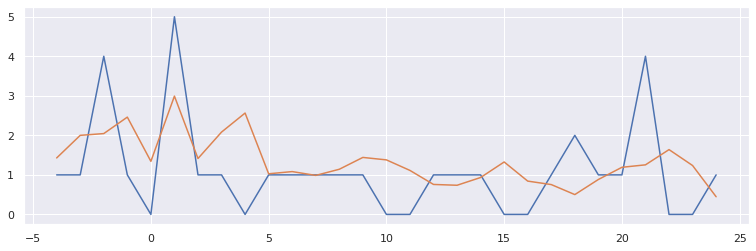

In [61]:
plt.rcParams["figure.figsize"] = (13,4)
subdata = data[data.deptocode == 13].sort_values("mesIndex")
plt.plot(subdata.mesIndex, subdata.hivc)

plt.plot(subdata.mesIndex, subdata.pred_hivc)

In [137]:
data[data.deptocode == 1][["hivc", "pred_hivc", "mesIndex"]].sort_values("mesIndex")

,hivc,pred_hivc,mesIndex
183,11.0,9.380997,-4
583,3.0,9.637419,-3
493,8.0,7.913307,-2
268,6.0,11.477833,-1
5,30.0,6.473708,0
71,5.0,20.322955,1
383,2.0,11.036726,2
123,3.0,8.404640,3
232,9.0,4.949694,4
628,3.0,4.630297,5


In [308]:
cols = cols_orig
gtproc["mesIndex"] = gtproc.mesIndex_orig + 1
# Lag1 Covs
sigsagt = gtproc[["mesIndex", "deptocode"]+cols]\
    .merge(sigsaAgg, on=["deptocode", "mesIndex"]).fillna(0).rename(columns= lambda x: x + "_lag1" if x in cols else x)

# Lags HIVC
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 1)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag1"],
       on=["deptocode", "mesIndex"]).fillna(0)
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 2)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag2"],
       on=["deptocode", "mesIndex"]).fillna(0)
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 3)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag3"],
       on=["deptocode", "mesIndex"]).fillna(0)


gtproc["mesIndex"] = gtproc.mesIndex_orig + 2
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag2" if x in cols else x)
gtproc["mesIndex"] = gtproc.mesIndex_orig + 3
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag3" if x in cols else x)
gtproc["mesIndex"] = gtproc.mesIndex_orig + 4
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag4" if x in cols else x)

for c in cols:
    sigsagt[c+"_lagAgg1_4"] = sigsagt[[c+"_lag"+str(l) for l in range(1,5)]].mean(axis=1)

None

In [309]:
sigsagt["deptocode2"] = sigsagt.deptocode.astype(str) + "_"

In [311]:
glmmod = stapi.MixedLM.from_formula(
    "np.log1p(hivc) ~ 1 " + 
    #" + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) " + 
    " + (fever_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag1") + 
    #" + (fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag4") + 
    #" + (fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4)*(fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4) "
    " + gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1 ".replace("lag1", "lag1") + \
    " + sexo_lag1 + mts_lag1 + gay_lag1 + fiesta_lag1 + sexoan_lag1 " + \
    " + np.log1p(hivc_lag1)  + np.log1p(hivc_lag2) + np.log1p(hivc_lag3)", 
    sigsagt[sigsagt.mesIndex < tsth], 
    "1", groups = "deptocode2")
#glmmod = stapi.GLM.from_formula("np.log(hivc) ~ sida_lag1 + vih_lag1 + sida_lag2 + vih_lag2 + deptocode2 ", sigsagt)

In [312]:
glmfit = glmmod.fit()

In [313]:
glmfit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
========================================================================
Model:                MixedLM     Dependent Variable:     np.log1p(hivc)
No. Observations:     352         Method:                 REML          
No. Groups:           22          Scale:                  0.2850        
Min. group size:      16          Likelihood:             -353.2632     
Max. group size:      16          Converged:              Yes           
Mean group size:      16.0                                              
------------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------------------
Intercept                     0.557    0.294  1.896 0.058  -0.019  1.133
fever_lag1                    0.000    0.001  0.288 0.774  -0.002  0.003
symptHIV_lag1                 1.349    5.816  0.232 0.817 -10.050 12.747
symptSIDA_lag1                0.138    0.125  1.106 0.269  -0.107  0.383
fever_lag1:symptHIV_lag1      0.021    0.121  0.173 0.863  -0.217  0.259
fever_lag1:symptSIDA_lag1     0.003    0.037  0.084 0.933  -0.069  0.075
symptHIV_lag1:symptSIDA_lag1  0.646    6.146  0.105 0.916 -11.400 12.693
gonorrea_lag1                 0.004    0.006  0.714 0.475  -0.007  0.016
sifilis_lag1                 -0.004    0.010 -0.464 0.643  -0.023  0.015
infiel_lag1                   0.004    0.004  1.021 0.307  -0.004  0.011
herpes_lag1                   0.001    0.001  0.392 0.695  -0.002  0.003
infdld_lag1                   0.001    0.006  0.083 0.934  -0.011  0.012
sexo_lag1                     0.003    0.003  0.862 0.389  -0.004  0.009
mts_lag1                     -0.012    0.022 -0.520 0.603  -0.056  0.032
gay_lag1                      0.000    0.009  0.043 0.965  -0.016  0.017
fiesta_lag1                  -0.050    0.050 -1.011 0.312  -0.147  0.047
sexoan_lag1                  -0.226    0.209 -1.077 0.281  -0.636  0.185
np.log1p(hivc_lag1)           0.155    0.063  2.457 0.014   0.031  0.278
np.log1p(hivc_lag2)           0.027    0.062  0.433 0.665  -0.095  0.148
np.log1p(hivc_lag3)           0.076    0.062  1.217 0.223  -0.046  0.199
deptocode2 Var                0.308    0.295                            
========================================================================

"""

In [314]:
pred_hivc = np.exp(glmfit.predict(sigsagt))-1

In [315]:
data["pred_hivc"] = pred_hivc

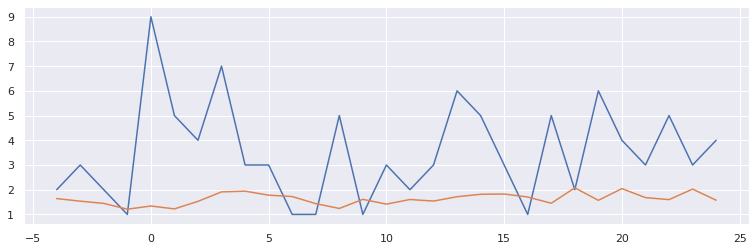

In [320]:
plt.rcParams["figure.figsize"] = (13,4)
subdata = data[data.deptocode == 10].sort_values("mesIndex")
plt.plot(subdata.mesIndex, subdata.hivc)

plt.plot(subdata.mesIndex, subdata.pred_hivc)

In [321]:
elnmod = sklm.ElasticNet(0.1)

In [322]:
    #" + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) " + 
    #" + (fever_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag3") + \
    #" + (fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag4") + \
    #" + (fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4)*(fever_lagAgg1_4 + headache_lagAgg1_4 + fatigue_lagAgg1_4 + symptHIV_lagAgg1_4 + symptSIDA_lagAgg1_4) "    
    #" + (fever_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fever_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag3") + \
    #" + (fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1)*(fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag4") + \

    #" + fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1 ".replace("lag1", "lag3") + \
    #" + gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1 ".replace("lag1", "lag3") + \
   # " + pca1_lag1 + pca2_lag1 + pca3_lag1 + pca4_lag1 + pca5_lag1 + pca6_lag1 + pca7_lag1 + pca8_lag1 ".replace("lag1", "lag3" ) +\
   # " + pca1_lag1 + pca2_lag1 + pca3_lag1 + pca4_lag1 + pca5_lag1 + pca6_lag1 + pca7_lag1 + pca8_lag1 ".replace("lag1", "lag4" ) +\
    
formula = "np.log1p(hivc) ~ 1 " + \
    " + fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1 ".replace("lag1", "lag3") + \
    " + gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1 ".replace("lag1", "lag3") + \
    " + sexo_lag1 + mts_lag1 + gay_lag1 + fiesta_lag1 + sexoan_lag1 ".replace("lag1", "lag3") + \
    " + np.log1p(hivc_lag1)  + np.log1p(hivc_lag2) + np.log1p(hivc_lag3)"
train_datap = patsy.dmatrices(formula, sigsagt[data.mesIndex<tsth])
test_datap = patsy.dmatrices(formula, sigsagt[data.mesIndex>=tsth])

In [323]:
elnmod.fit(train_datap[1], train_datap[0]) 

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [324]:
pred_target =  np.exp(elnmod.predict(test_datap[1]))-1

In [325]:
sigsagt.loc[data.mesIndex < tsth , "pred_hivc"] = np.exp(elnmod.predict(train_datap[1]))-1
sigsagt.loc[data.mesIndex >= tsth , "pred_hivc"] = pred_target

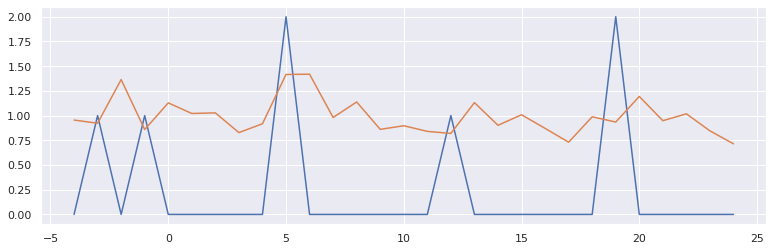

In [332]:
plt.rcParams["figure.figsize"] = (13,4)
subdata = data[data.deptocode == 19].sort_values("mesIndex")
plt.plot(subdata.mesIndex, subdata.hivc)

plt.plot(subdata.mesIndex, subdata.pred_hivc)

In [172]:
data[data.deptocode == 1].sort_values("mesIndex")[["hivc", "pred_hivc"]]

,hivc,pred_hivc
183,11.0,2.797147
583,3.0,4.044352
493,8.0,5.705182
268,6.0,8.100047
5,30.0,5.819362
71,5.0,6.481197
383,2.0,2.617332
123,3.0,1.185194
232,9.0,4.194070
628,3.0,3.589157


In [333]:
metrics.mean_squared_error(data[data.mesIndex>20].hivc, data[data.mesIndex>20].pred_hivc)

93.71868702695865

In [334]:
data.shape

(638, 77)

# GAM model

In [62]:
import pygam

In [63]:
use_pca = False
if use_pca:
    cols = pcas
else:
    cols = cols_orig

In [64]:
gtproc["mesIndex"] = gtproc.mesIndex_orig + 1
# Lag1 Covs
sigsagt = gtproc[["mesIndex", "deptocode"]+cols]\
    .merge(sigsaAgg, on=["deptocode", "mesIndex"]).fillna(0).rename(columns= lambda x: x + "_lag1" if x in cols else x)

# Lags HIVC
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 1)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag1"],
       on=["deptocode", "mesIndex"]).fillna(0)
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 2)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag2"],
       on=["deptocode", "mesIndex"]).fillna(0)
sigsagt = sigsagt\
    .merge(sigsagt.assign(mesIndex = lambda x: x.mesIndex + 3)[["mesIndex", "deptocode", "hivc"]], suffixes = ["", "_lag3"],
       on=["deptocode", "mesIndex"]).fillna(0)


gtproc["mesIndex"] = gtproc.mesIndex_orig + 2
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag2" if x in cols else x)
gtproc["mesIndex"] = gtproc.mesIndex_orig + 3
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag3" if x in cols else x)
gtproc["mesIndex"] = gtproc.mesIndex_orig + 4
sigsagt = sigsagt\
    .merge(gtproc[["mesIndex", "deptocode"]+cols], on=["deptocode", "mesIndex"]).fillna(0)\
    .rename(columns= lambda x: x + "_lag4" if x in cols else x)

for c in cols:
    sigsagt[c+"_lagAgg1_4"] = sigsagt[[c+"_lag"+str(l) for l in range(1,5)]].mean(axis=1)

None

In [65]:
sigsagt["deptocode2"] = sigsagt.deptocode.astype(int).astype(str) + "_"

In [66]:
data = sigsagt.copy()
data.hivc = data.hivc + 1

In [67]:
data = data.merge(pd.get_dummies(data.deptocode2, prefix = "dp"), left_index=True, right_index=True)

In [68]:
data = data.merge(pd.get_dummies(data.Mes.astype(int)//4, prefix = "m"), left_index=True, right_index=True)

In [69]:
data.deptocode.value_counts().sort_index()

1     29
2     29
3     29
4     29
5     29
6     29
7     29
8     29
9     29
10    29
11    29
12    29
13    29
14    29
15    29
16    29
17    29
18    29
19    29
20    29
21    29
22    29
Name: deptocode, dtype: int64

In [70]:
if not use_pca:
    # " + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag3") +\
    #    " + (gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1) ".replace("lag1", "lag3") +\
        #  + str.join(" + ",[x for x in data.columns if "dp_" in x]) +  \
    formula = "hivc ~ 1 "\
        " + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag4") +\
        " + (gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1) ".replace("lag1", "lag4") +\
        " + (sexo_lag1 + mts_lag1 + gay_lag1 + fiesta_lag1 + sexoan_lag1) ".replace("lag1", "lag4") + \
        " + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag3") +\
        " + (gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1) ".replace("lag1", "lag3") +\
        " + (sexo_lag1 + mts_lag1 + gay_lag1 + fiesta_lag1 + sexoan_lag1) ".replace("lag1", "lag3") + \
        " + np.log1p(hivc_lag1)  + np.log1p(hivc_lag2) + np.log1p(hivc_lag3)"
elif use_pca:
    formula = "hivc ~ 1 " + \
        " + pca1_lag1 + pca2_lag1 + pca3_lag1 + pca4_lag1 + pca5_lag1 + pca6_lag1 + pca7_lag1 + pca8_lag1 ".replace("lag1", "lag2" ) +\
        " + pca1_lag1 + pca2_lag1 + pca3_lag1 + pca4_lag1 + pca5_lag1 + pca6_lag1 + pca7_lag1 + pca8_lag1 ".replace("lag1", "lag3" ) +\
        " + pca1_lag1 + pca2_lag1 + pca3_lag1 + pca4_lag1 + pca5_lag1 + pca6_lag1 + pca7_lag1 + pca8_lag1 ".replace("lag1", "lag4" ) +\
        " + np.log1p(hivc_lag1)  + np.log1p(hivc_lag2) + np.log1p(hivc_lag3)"

In [71]:
test_thr = tsth
train_datap = patsy.dmatrices(formula, data[data.mesIndex<test_thr])
test_datap = patsy.dmatrices(formula, data[data.mesIndex>=test_thr])

In [72]:
train_datap[1].shape

(352, 34)

In [1035]:
gammod = pygam.PoissonGAM(n_splines=15, lam=300)

In [1036]:
gamfit = gammod.fit(train_datap[1], train_datap[0]) # gridsearch

In [1037]:
data.loc[data.mesIndex < test_thr , "pred_hivc"] = gammod.predict(train_datap[1])
data.loc[data.mesIndex >= test_thr , "pred_hivc"] = gammod.predict(test_datap[1])

In [1038]:
metrics.mean_squared_error(data[data.mesIndex>=tsth].hivc, data[data.mesIndex>=tsth].pred_hivc)

43.5086276289676

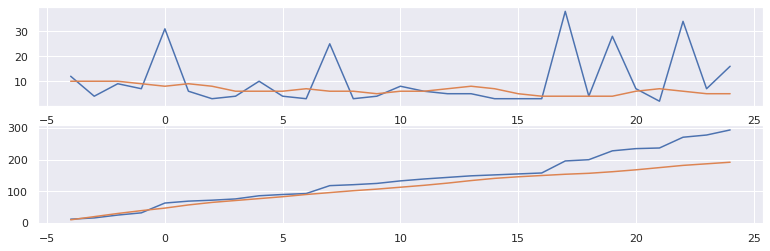

In [1039]:
plt.rcParams["figure.figsize"] = (13,4)
subdata = data[data.deptocode == 1].sort_values("mesIndex")
plt.subplot(2,1,1)
plt.plot(subdata.mesIndex, subdata.hivc)
plt.plot(subdata.mesIndex, np.round(subdata.pred_hivc))
plt.subplot(2,1,2)
plt.plot(subdata.mesIndex, subdata.hivc.cumsum())
plt.plot(subdata.mesIndex, np.round(subdata.pred_hivc.cumsum()))

In [368]:
gamfit.logs_['deviance']

[122.49767014263094,
 212.0089159209465,
 206.1624412510183,
 208.01809619427382,
 208.01649868163827,
 208.06616475035693,
 208.067268734999]

In [369]:
gamfit.summary()

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                     98.8926
Link Function:                          LogLink Log Likelihood:                                   -603.943
Number of Samples:                          352 AIC:                                             1405.6713
                                                AICc:                                            1485.9432
                                                UBRE:                                               3.3778
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8507
Feature Function                  Lam

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [388]:
data[data.deptocode == 1].sort_values("mesIndex")[["hivc", "pred_hivc", "mesIndex"]]

,hivc,pred_hivc,mesIndex
183,12.0,11.376830,-4
583,4.0,10.063509,-3
493,9.0,8.909775,-2
268,7.0,8.343897,-1
5,31.0,8.941726,0
71,6.0,9.328075,1
383,3.0,7.619701,2
123,4.0,5.325119,3
232,10.0,6.110307,4
628,4.0,5.962739,5


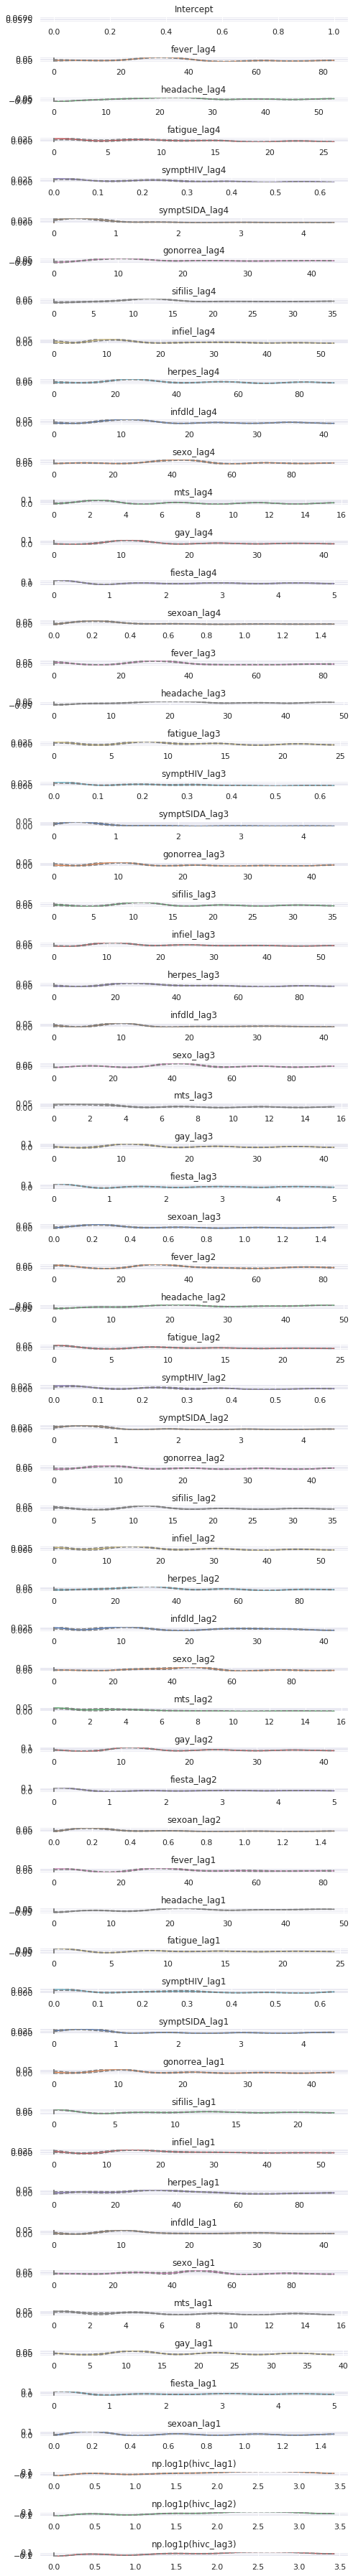

In [389]:
plt.rcParams['figure.figsize'] = (7, 50)
fig, axs = plt.subplots(train_datap[1].shape[1],1)
for i, ax in enumerate(axs):
    xs = gammod.generate_X_grid(i)
    pdep, confi = gammod.partial_dependence(i, X=xs, width=.95)
    
    ax.plot(xs, pdep)
    ax.plot(xs, confi[:, 0], c='grey', ls='--')
    ax.plot(xs, confi[:, 1], c='grey', ls='--')
    ax.set_title(train_datap[1].design_info.column_names[i])
    #ax.scatter(train_datap[1][:,i], np.log(train_datap[0][:]))
plt.tight_layout()

# Tensorflow

In [73]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [74]:
data = sigsagt.copy()
data.hivc = data.hivc + 1

In [75]:
data = data.merge(pd.get_dummies(data.deptocode2, prefix = "dp"), left_index=True, right_index=True)

In [76]:
data = data.merge(pd.get_dummies(data.Mes.astype(int)//4, prefix = "m"), left_index=True, right_index=True)

In [78]:
data.deptocode.value_counts().sort_index()

1     29
2     29
3     29
4     29
5     29
6     29
7     29
8     29
9     29
10    29
11    29
12    29
13    29
14    29
15    29
16    29
17    29
18    29
19    29
20    29
21    29
22    29
Name: deptocode, dtype: int64

In [79]:
sigsagt.columns

Index(['mesIndex', 'deptocode', 'fever_lag1', 'headache_lag1', 'fatigue_lag1', 'symptHIV_lag1', 'symptSIDA_lag1', 'gonorrea_lag1', 'sifilis_lag1', 'infiel_lag1', 'herpes_lag1', 'infdld_lag1',
       'sexo_lag1', 'mts_lag1', 'gay_lag1', 'fiesta_lag1', 'sexoan_lag1', 'Residencia Actual-Depto', 'Año', 'Mes', 'hivc', 'hivc_lag1', 'hivc_lag2', 'hivc_lag3', 'fever_lag2', 'headache_lag2',
       'fatigue_lag2', 'symptHIV_lag2', 'symptSIDA_lag2', 'gonorrea_lag2', 'sifilis_lag2', 'infiel_lag2', 'herpes_lag2', 'infdld_lag2', 'sexo_lag2', 'mts_lag2', 'gay_lag2', 'fiesta_lag2',
       'sexoan_lag2', 'fever_lag3', 'headache_lag3', 'fatigue_lag3', 'symptHIV_lag3', 'symptSIDA_lag3', 'gonorrea_lag3', 'sifilis_lag3', 'infiel_lag3', 'herpes_lag3', 'infdld_lag3', 'sexo_lag3',
       'mts_lag3', 'gay_lag3', 'fiesta_lag3', 'sexoan_lag3', 'fever_lag4', 'headache_lag4', 'fatigue_lag4', 'symptHIV_lag4', 'symptSIDA_lag4', 'gonorrea_lag4', 'sifilis_lag4', 'infiel_lag4',
       'herpes_lag4', 'infdld_lag4', 'sex

In [99]:
formula = "hivc ~ 1 "\
    " + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag4") +\
    " + (gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1) ".replace("lag1", "lag4") +\
    " + (sexo_lag1 + mts_lag1 + gay_lag1 + fiesta_lag1 + sexoan_lag1) ".replace("lag1", "lag4") + \
    " + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag3") +\
    " + (gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1) ".replace("lag1", "lag3") +\
    " + (sexo_lag1 + mts_lag1 + gay_lag1 + fiesta_lag1 + sexoan_lag1) ".replace("lag1", "lag3") + \
    " + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag2") +\
    " + (gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1) ".replace("lag1", "lag2") +\
    " + (sexo_lag1 + mts_lag1 + gay_lag1 + fiesta_lag1 + sexoan_lag1) ".replace("lag1", "lag2") + \
    " + (fever_lag1 + headache_lag1 + fatigue_lag1 + symptHIV_lag1 + symptSIDA_lag1) ".replace("lag1", "lag1") +\
    " + (gonorrea_lag1 + sifilis_lag1 + infiel_lag1 + herpes_lag1 + infdld_lag1) ".replace("lag1", "lag1") +\
    " + (sexo_lag1 + mts_lag1 + gay_lag1 + fiesta_lag1 + sexoan_lag1) ".replace("lag1", "lag1") + \
    " + np.log1p(hivc_lag1)  + np.log1p(hivc_lag2) + np.log1p(hivc_lag3)"

In [100]:
test_thr = tsth
train_datap = patsy.dmatrices(formula, data[data.mesIndex<test_thr])
test_datap = patsy.dmatrices(formula, data[data.mesIndex>=test_thr])

In [101]:
train_datap[1].shape#data[data.mesIndex<test_thr].groupby(["mesIndex", "Año", "deptocode2"]).apply(len)

(352, 64)

In [122]:
tfmodel = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation="relu", input_shape=[train_datap[1].shape[1]], 
                          bias_initializer = "normal", 
                          kernel_initializer = "normal",
                          kernel_regularizer="l2",
                          bias_regularizer="l2"
                    ),
    tf.keras.layers.Dense(50, activation="relu",
                          bias_initializer = "normal", 
                          kernel_initializer = "normal",
                          kernel_regularizer="l2",
                          bias_regularizer="l2"
                    ),
    tf.keras.layers.Dense(50, activation="relu",
                          bias_initializer = "normal", 
                          kernel_initializer = "normal",
                          kernel_regularizer="l2",
                          bias_regularizer="l2"
                    ),
    tf.keras.layers.Dense(50, activation="relu",
                          bias_initializer = "normal", 
                          kernel_initializer = "normal",
                          kernel_regularizer="l2",
                          bias_regularizer="l2"
                    ),
    tf.keras.layers.Dense(50, activation="relu",
                          bias_initializer = "normal", 
                          kernel_initializer = "normal",
                          kernel_regularizer="l2",
                          bias_regularizer="l2"
                    ),
    tf.keras.layers.Dense(train_datap[0].shape[1], activation=None)
])

In [123]:
#tfopt = tf.keras.optimizers.SGD()
tfopt = tf.keras.optimizers.SGD(lr=0.001, decay=0.00005)
tfmodel.compile(optimizer=tfopt,
              loss="mse" )

In [124]:
tfmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                3250      
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_28 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_29 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 51        
Total params: 13,501
Trainable params: 13,501
Non-trainable params: 0
_________________________________________________________________


In [125]:
regmod = StandardScaler()

In [126]:
XsScaled = regmod.fit_transform(train_datap[1])

In [127]:
#tfmodel.optimizer.lr.assign(0.0001)

In [128]:
tffits = []

In [129]:
tffits.append(tfmodel.fit(XsScaled, np.log1p(train_datap[0]), epochs=2000, batch_size=10, shuffle=True, validation_split=0.2, verbose=True) )

Train on 281 samples, validate on 71 samples
Epoch 1/2000
281/281 [==============================] - 0s 2ms/step - loss: 2.2566 - val_loss: 2.2510
Epoch 2/2000
281/281 [==============================] - 0s 343us/step - loss: 1.9600 - val_loss: 1.9749
Epoch 3/2000
281/281 [==============================] - 0s 355us/step - loss: 1.7393 - val_loss: 1.7553
Epoch 4/2000
281/281 [==============================] - 0s 366us/step - loss: 1.5565 - val_loss: 1.5877
Epoch 5/2000
281/281 [==============================] - 0s 339us/step - loss: 1.4156 - val_loss: 1.4420
Epoch 6/2000
281/281 [==============================] - 0s 349us/step - loss: 1.2968 - val_loss: 1.3168
Epoch 7/2000
281/281 [==============================] - 0s 305us/step - loss: 1.1966 - val_loss: 1.2148
Epoch 8/2000
281/281 [==============================] - 0s 329us/step - loss: 1.1168 - val_loss: 1.1336
Epoch 9/2000
281/281 [==============================] - 0s 348us/step - loss: 1.0543 - val_loss: 1.0673
Epoch 10/2000
281/281

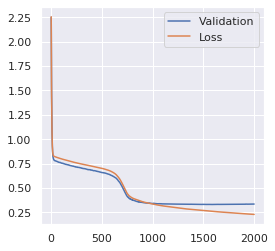

In [130]:
plt.rcParams["figure.figsize"] = (4,4)
plt.plot(np.hstack ([tffit.history["val_loss"] for tffit in tffits]), label="Validation")
plt.plot(np.hstack ([tffit.history["loss"] for tffit in tffits]), label="Loss")
plt.legend()
#plt.yscale("log")
None

In [131]:
data.loc[data.mesIndex < test_thr , "pred_hivc"] = np.exp(tfmodel.predict(regmod.transform(train_datap[1])))-1
data.loc[data.mesIndex >= test_thr , "pred_hivc"] = np.exp(tfmodel.predict(regmod.transform(test_datap[1])))-1

In [132]:
data[data.mesIndex>=tsth].hivc.mean()

5.0524475524475525

In [133]:
[
    metrics.mean_squared_error(data[data.mesIndex>=tsth].hivc, np.ones(data[data.mesIndex>=tsth].pred_hivc.shape) * np.mean(data[data.mesIndex>=tsth].hivc)), 
    metrics.mean_squared_error(data[data.mesIndex>=tsth].hivc, data[data.mesIndex>=tsth].pred_hivc)
]

[56.336410093403096, 34.918585076165215]

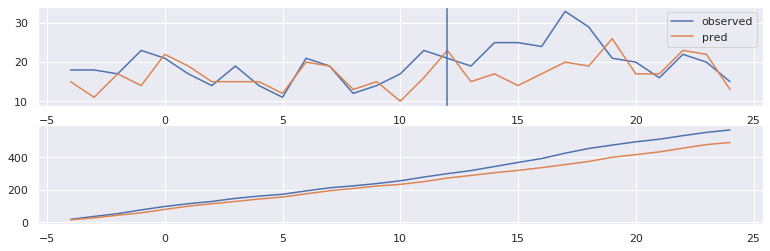

In [160]:
plt.rcParams["figure.figsize"] = (13,4)
subdata = data[data.deptocode == 5].sort_values("mesIndex")
plt.subplot(2,1,1)
plt.plot(subdata.mesIndex, subdata.hivc, label="observed")
plt.plot(subdata.mesIndex, np.round(subdata.pred_hivc), label="pred")
plt.legend()
plt.axvline(tsth, label="forecast")
plt.subplot(2,1,2)
plt.plot(subdata.mesIndex, subdata.hivc.cumsum())
plt.plot(subdata.mesIndex, np.round(subdata.pred_hivc.cumsum()))

# np.vstack([data[data.mesIndex>=tsth].hivc, data[data.mesIndex>=tsth].pred_hivc]).T